<a href="https://colab.research.google.com/github/8bitnael/SpamDetection_L5IT02/blob/main/L5IT02_1_2__DanieleCastrovinci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 1.0

Confusion Matrix:
 [[19  0]
 [ 0  1]]

Classification Report:
               precision    recall  f1-score   support

         ham       1.00      1.00      1.00        19
        spam       1.00      1.00      1.00         1

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



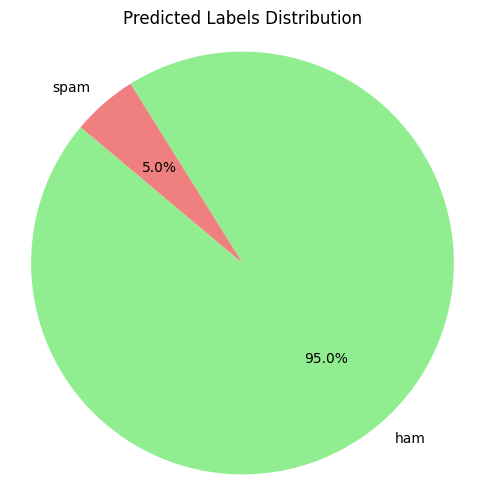

In [35]:
# Network Security L5IT02
# DANIELE CASTROVINCI
# SPAM DETECTION WITH TENSORFLOW AND COLAB
# TASK: 1.2:Select one of the above threats and elaborate how Artificial Intelligence
# has already been used in security software to detect and defend against it

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np # chart pie
import matplotlib.pyplot as plt # matrix
import seaborn as sns           # matrix
#import pdb; pdb.set_trace()    ## DEBUGGING
### Load dataset  using Pandas (pd) to read the CSV file into a DataFrame (data)
# data  = pd.read_csv("mail_data.csv")
data  = pd.read_csv("light.csv")
### Display first few rows to understand the structure
# print(data.head())
### Data Preprocessing Assign features and target variable
X = data['Message']  # Message column of CSV that will be used as input for the model.
y = data['Category'] # Category column which indicates whether a message is 'ham' or 'spam'.
### y = y.map({'ham': 0, 'spam': 1})### We're mapping these categories to numerical values (0 for 'ham' and 1 for 'spam').

### Split the dataset into training (X_train, y_train) and testing  (X_test, y_test) sets.
# Here, 80% of the data is used for training (train_size=0.8) and 20% for testing (test_size=0.2).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Extraction (Using CountVectorizer)
### Initialize CountVectorizer - converts the text data into numerical features. It represents each text message as a vector of word counts.
vectorizer = CountVectorizer()
### Fit and transform the training data - fit_transform() learns the vocabulary from the training data and transforms it into a document-term matrix.
X_train_count = vectorizer.fit_transform(X_train)
### Transform the test data -transform() uses the same vocabulary to transform the test data into a similar document-term matrix.
X_test_count = vectorizer.transform(X_test)
#print(X_test_count)
###  Train the Model (Using Multinomial Naive Bayes) initializing the Naive Bayes classifier
clf = MultinomialNB()
### Train the model  -fit() trains the classifier on the training data (X_train_count) and their corresponding labels (y_train).
clf.fit(X_train_count, y_train)
### Predict on the test data - predict() generates predictions on the test data using the trained model.
y_pred = clf.predict(X_test_count)
### Calculate accuracy accuracy_score() calculates the accuracy of the model's predictions compared to the actual labels.
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
###  Print confusion matrix and classification report
#### confusion_matrix() and classification_report() provide more detailed evaluation metrics, such as precision, recall, and F1-score,
#### along with a confusion matrix showing true positive, true negative, false positive, and false negative values
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# Counting the occurrences of each label in the predicted values
unique_labels, label_counts = np.unique(y_pred, return_counts=True)

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=unique_labels, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
plt.title('Predicted Labels Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()








